# Prediction using Supervised ML

# Author : Dhruv Desai

#  Problem Statement

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● What will be predicted score if a student studies for 9.25 hrs/ day?

# 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split #sklearn
from sklearn.linear_model import LinearRegression

# 2. Importing Dataset

In [3]:
df = pd.read_csv("dataset.csv")

# 3. Exploratory Data Analysis

# 3.1 Dataset Shape

In [4]:
df.shape

(25, 2)

# 3.2 Viewing the Dataset

In [5]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# 3.3 Describing the Dataset

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# 3.4 Checking any missing values

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# 3.5 Detail information of Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


# 4. Data Visualization

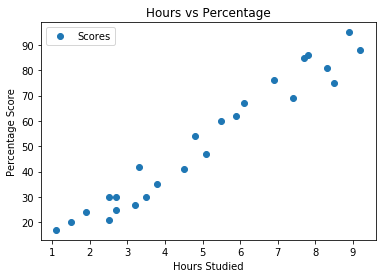

In [9]:
#Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above figure we can say that there is a linear relation betweeen the number of hours studied vs percentage scored

# 5. Data Processing

In [10]:
#Division of data into attributes(input) and labels(output)
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

# 6. Model Training

In [11]:
#Splitting the data into traning and testing sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [12]:
#traning the algorithm
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# 7. Plotting the Regression line

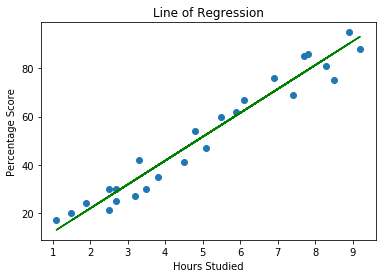

In [13]:
# Plotting the regression line 
line = regression_model.coef_*X+regression_model.intercept_
plt.scatter(X, y)
plt.title('Line of Regression')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.plot(X, line,c='g');
plt.show()

In [14]:
#coefficients for the prediction of each of the targets
print(regression_model.coef_)

[9.91065648]


# 8. Making Predictions

In [15]:
#model prediction
y_pred_train = regression_model.predict(X_train)
y_pred_test = regression_model.predict(X_test)
# Testing data
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# 9. Comparision of Actual and Predicted Model result

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#Estimating training and test score
regression_model.score(X_train,y_train)

0.9515510725211553

In [20]:
regression_model.score(X_test,y_test)

0.9454906892105356

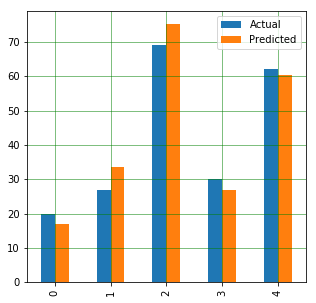

In [21]:
#Plotting the Bar graph to visualize the difference between the actual and predicted value
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='red')
plt.show()

In [22]:
#Adding interaction terms 

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2,interaction_only=True)
y_pred_train = poly.fit_transform(X_train)
y_pred_test = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(y_pred_train,y_train)
y_pred = poly_clf.predict(y_pred_test)
print(poly_clf.score(y_pred_train,y_train))



print(poly_clf.score(y_pred_test,y_test))


print(X_train.shape)
print(y_pred_train.shape)

0.9515510725211553
0.9454906892105356
(20, 1)
(20, 2)


as we can see that my adding one more varible there is not change in prediction score on training dataset

# 10. Predicting with user input data

In [23]:
hours = [[float(input())]] #user input - i put 9.25 according to task question
own_pred = regression_model.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score (Percentage) = {}".format(min(own_pred[0],100))) 
#if predicted percentage > 100 then print 100 as percentage cannot be > 100

9.25
No of Hours = 9.25
Predicted Score (Percentage) = 93.69173248737538


# 11. Model Evaluation

The last step is to evaluate the performance of algorithm.
This step is important to compare how well different algorithms perform on a particular dataset,
by finding different errors have been calculated to compare the model performance and predict the accuracy.

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217378
Root Mean Squared Error: 4.647447612100364
R-2: 0.9454906892105356


R2 gives the score of model fit and in this case we have 0.9454906892105354 which is actually a great score for this mode.